In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings("ignore")
from pybaseball import pitching_stats

In [3]:
START = 2002
END = 2024

In [4]:
pitching = pitching_stats(START, END, qual=50)

In [5]:
pitching.to_csv("pitching.csv")

In [6]:
pitching = pitching.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0] > 1)

In [7]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
788,60,2004,Randy Johnson,ARI,40,16,14,9.6,2.60,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,73,2002,Curt Schilling,ARI,35,23,7,9.3,3.23,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,18282,2018,Jarlin Garcia,MIA,25,3,3,-1.3,4.91,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7133,1646,2010,Brian Tallet,TOR,32,2,6,-1.3,6.40,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7038,9388,2018,Josh Tomlin,CLE,33,2,5,-1.4,6.14,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,3245,2010,Ryan Rowland-Smith,SEA,27,1,10,-1.5,6.75,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)

In [9]:
null_count = pitching.isnull().sum()

In [10]:
null_count

IDfg            0
Season          0
Name            0
Team            0
Age             0
             ... 
Pitching+    5521
Stf+ FO      6804
Loc+ FO      6804
Pit+ FO      6804
Next_WAR     1371
Length: 394, dtype: int64

In [11]:
complete_cols = list(pitching.columns[null_count == 0])

In [12]:
pitching = pitching[complete_cols + ["Next_WAR"]].copy()

In [13]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3622,3,2002,Kevin Appier,ANA,34,14,12,2.6,3.92,32,...,103,107,88,106,100,97,0,0.178,0.263,0.1
6463,3,2003,Kevin Appier,- - -,35,8,9,0.1,5.40,23,...,105,117,75,89,105,95,0,0.187,0.262,NaN
967,18,2010,Neftali Feliz,TEX,22,4,3,2.0,2.73,70,...,78,88,151,134,99,80,0,0.165,0.284,1.0
991,18,2011,Neftali Feliz,TEX,23,2,3,1.0,2.74,64,...,91,106,106,106,89,119,0,0.159,0.274,-0.1
2569,18,2016,Neftali Feliz,PIT,28,4,2,-0.1,3.52,62,...,92,78,142,102,88,118,135,0.117,0.259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,30122,2024,Gavin Williams,CLE,24,3,10,1.3,4.86,16,...,85,96,131,88,103,102,218,0.151,0.255,NaN
1371,30134,2023,Tanner Bibee,CLE,24,10,4,3.0,2.98,25,...,93,108,99,108,102,93,394,0.165,0.276,3.3
2445,30134,2024,Tanner Bibee,CLE,25,12,8,3.3,3.47,31,...,100,88,118,94,104,96,471,0.152,0.274,NaN
4345,30279,2023,Bryan Woo,SEA,23,4,5,0.9,4.21,18,...,88,99,121,113,107,83,240,0.152,0.276,2.3


In [14]:
del pitching["Dollars"]

In [15]:
del pitching["Age Rng"]

In [16]:
del pitching["Team"]

In [17]:
pitching

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3622,3,2002,Kevin Appier,34,14,12,2.6,3.92,32,32,...,103,107,88,106,100,97,0,0.178,0.263,0.1
6463,3,2003,Kevin Appier,35,8,9,0.1,5.40,23,23,...,105,117,75,89,105,95,0,0.187,0.262,NaN
967,18,2010,Neftali Feliz,22,4,3,2.0,2.73,70,0,...,78,88,151,134,99,80,0,0.165,0.284,1.0
991,18,2011,Neftali Feliz,23,2,3,1.0,2.74,64,0,...,91,106,106,106,89,119,0,0.159,0.274,-0.1
2569,18,2016,Neftali Feliz,28,4,2,-0.1,3.52,62,0,...,92,78,142,102,88,118,135,0.117,0.259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,30122,2024,Gavin Williams,24,3,10,1.3,4.86,16,16,...,85,96,131,88,103,102,218,0.151,0.255,NaN
1371,30134,2023,Tanner Bibee,24,10,4,3.0,2.98,25,25,...,93,108,99,108,102,93,394,0.165,0.276,3.3
2445,30134,2024,Tanner Bibee,25,12,8,3.3,3.47,31,31,...,100,88,118,94,104,96,471,0.152,0.274,NaN
4345,30279,2023,Bryan Woo,23,4,5,0.9,4.21,18,18,...,88,99,121,113,107,83,240,0.152,0.276,2.3


In [18]:
pitching = pitching.dropna()

In [19]:
pitching

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3622,3,2002,Kevin Appier,34,14,12,2.6,3.92,32,32,...,103,107,88,106,100,97,0,0.178,0.263,0.1
967,18,2010,Neftali Feliz,22,4,3,2.0,2.73,70,0,...,78,88,151,134,99,80,0,0.165,0.284,1.0
991,18,2011,Neftali Feliz,23,2,3,1.0,2.74,64,0,...,91,106,106,106,89,119,0,0.159,0.274,-0.1
4421,20,2002,Al Levine,34,4,4,-0.4,4.24,52,0,...,78,127,108,71,101,117,0,0.159,0.243,-0.3
1054,20,2003,Al Levine,35,3,6,-0.3,2.79,54,0,...,102,91,106,130,100,80,0,0.150,0.223,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,29837,2023,Bryce Miller,24,8,7,1.9,4.32,25,25,...,92,110,98,84,99,110,385,0.147,0.261,2.8
3508,29911,2023,Andrew Abbott,24,8,6,2.2,3.87,21,21,...,93,105,106,85,101,106,294,0.160,0.269,1.0
2019,30122,2023,Gavin Williams,23,3,5,1.1,3.29,16,16,...,86,111,108,81,115,86,223,0.156,0.278,1.3
1371,30134,2023,Tanner Bibee,24,10,4,3.0,2.98,25,25,...,93,108,99,108,102,93,394,0.165,0.276,3.3


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

In [21]:
df = pitching.copy()

In [22]:
# =========================
# 1) Feature set
# =========================
exclude = {'Next_WAR', 'Season', 'Name', 'Team'}
if 'IDfg' in df.columns:
    exclude.add('IDfg')

feature_cols = [c for c in df.columns if c not in exclude]
X_all = df[feature_cols].select_dtypes(include=[np.number]).copy()
y_all = df['Next_WAR'].values
num_features = X_all.columns.tolist()

In [23]:
# =========================
# 2) Per-model preprocessing
# =========================
scaler = ColumnTransformer([('num', StandardScaler(), num_features)], remainder='drop')
passthrough = ColumnTransformer([('num', 'passthrough', num_features)], remainder='drop')

MODELS = {
    # Linear (needs scaling)
    'Ridge': (scaler, Ridge(alpha=5.0, random_state=42)),
    'Lasso': (scaler, Lasso(alpha=0.01, max_iter=20000, random_state=42)),

    # KNN (distance-based → needs scaling)
    'KNN': (scaler, KNeighborsRegressor(n_neighbors=15, weights='distance', p=2)),

    # Tree/boosting (no scaling)
    'RandomForest': (passthrough, RandomForestRegressor(
        n_estimators=600, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    )),
    'GradientBoosting': (passthrough, GradientBoostingRegressor(
        learning_rate=0.05, n_estimators=800, subsample=0.9, max_depth=3, random_state=42
    )),
    'XGBoost': (passthrough, XGBRegressor(
        n_estimators=1200, max_depth=6, learning_rate=0.03, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, objective='reg:squarederror', n_jobs=-1, random_state=42
    )),
}

In [24]:
# =========================
# 3) Metrics helpers
# =========================
def evaluate(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'R2': r2}


In [25]:
# =========================
# 4) Walk-forward backtest
# =========================
seasons = sorted(df['Season'].unique())
results = []
pred_store = {}

for cutoff in seasons[:-1]:
    train_idx = df['Season'] <= cutoff
    test_idx  = df['Season'] == (cutoff + 1)
    if not test_idx.any():
        continue

    X_train, X_test = X_all.loc[train_idx], X_all.loc[test_idx]
    y_train, y_test = y_all[train_idx], y_all[test_idx]

    for name, (prep, est) in MODELS.items():
        pipe = Pipeline([('prep', prep), ('model', est)])
        pipe.fit(X_train, y_train)
        yhat = pipe.predict(X_test)

        m = evaluate(y_test, yhat)
        m.update({'Model': name, 'train_upto': int(cutoff), 'test_year': int(cutoff + 1)})
        results.append(m)

        pred_store[(name, int(cutoff + 1))] = yhat

In [26]:
# =========================
# 5) Aggregate and show leaderboards (RMSE & R2 only)
# =========================
res_df = pd.DataFrame(results)
if res_df.empty:
    raise RuntimeError("No backtest splits were evaluated. Check Season coverage.")

metrics = ['RMSE', 'R2']

agg = (res_df
       .groupby('Model')[metrics]
       .agg(['mean','std'])
       .sort_values(('RMSE','mean')))

print("\n=== Walk-forward Backtest (train ≤ year, test = year+1) ===")
print(agg.round(4))

def fmt_mean_std(s):
    return f"{s['mean']:.3f} ± {s['std']:.3f}"

leaderboard = pd.DataFrame({
    'RMSE': agg['RMSE'].apply(fmt_mean_std, axis=1),
    'R2':   agg['R2'].apply(fmt_mean_std, axis=1),
})

print("\n=== Leaderboard (mean ± std across test years) ===")
print(leaderboard)



=== Walk-forward Backtest (train ≤ year, test = year+1) ===
                    RMSE              R2        
                    mean     std    mean     std
Model                                           
Lasso             1.2195  0.1761  0.3377  0.1722
RandomForest      1.2272  0.1433  0.3273  0.1704
Ridge             1.2351  0.1833  0.3174  0.2008
XGBoost           1.2530  0.1508  0.2970  0.1928
KNN               1.2613  0.1670  0.2908  0.1802
GradientBoosting  1.2672  0.1594  0.2784  0.2207

=== Leaderboard (mean ± std across test years) ===
                           RMSE             R2
Model                                         
Lasso             1.220 ± 0.176  0.338 ± 0.172
RandomForest      1.227 ± 0.143  0.327 ± 0.170
Ridge             1.235 ± 0.183  0.317 ± 0.201
XGBoost           1.253 ± 0.151  0.297 ± 0.193
KNN               1.261 ± 0.167  0.291 ± 0.180
GradientBoosting  1.267 ± 0.159  0.278 ± 0.221


In [27]:
def backtest_lasso(df, alpha=0.01, max_iter=20000, random_state=42):
    df_ = df.copy()

    exclude = {'Next_WAR', 'Season', 'Name', 'Team'}
    if 'IDfg' in df_.columns:
        exclude.add('IDfg')
    feature_cols = [c for c in df_.columns if c not in exclude]
    X = df_[feature_cols].select_dtypes(include=[np.number]).copy()
    y = df_['Next_WAR'].to_numpy()
    num_features = X.columns.tolist()

    scaler = ColumnTransformer([('num', StandardScaler(), num_features)], remainder='drop')
    lasso  = Lasso(alpha=alpha, max_iter=max_iter, random_state=random_state)
    pipe   = Pipeline([('prep', scaler), ('model', lasso)])

    seasons = sorted(df_['Season'].unique())
    results, pred_store = [], {}

    for cutoff in seasons[:-1]:
        test_year = int(cutoff + 1)
        train_idx = df_['Season'] <= cutoff
        test_idx  = df_['Season'] == test_year
        if not test_idx.any():
            continue

        X_train, X_test = X.loc[train_idx], X.loc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipe.fit(X_train, y_train)
        yhat = pipe.predict(X_test)

        m = evaluate(y_test, yhat)
        m.update({'Model': 'Lasso', 'train_upto': int(cutoff), 'test_year': test_year})
        results.append(m)
        pred_store[test_year] = np.asarray(yhat)

    res_df = pd.DataFrame(results)
    if res_df.empty:
        raise RuntimeError("No backtest splits were evaluated. Check Season coverage in the provided df.")

    summary = res_df.groupby('Model')[['RMSE','R2']].agg(['mean','std'])

    year_stats = {}
    for test_year, preds in pred_store.items():
        y_true = df_.loc[df_['Season'] == test_year, 'Next_WAR'].to_numpy()
        n = min(len(y_true), len(preds))
        if n == 0:
            continue
        year_stats[test_year] = {"true": y_true[:n], "pred": preds[:n]}

    return res_df, summary, year_stats

In [28]:
def bootstrap_ci_mean(arr, B=2000, alpha=0.05, rng=None):
    arr = np.asarray(arr)
    if rng is None:
        rng = np.random.default_rng(42)
    if arr.size <= 1:
        m = float(arr.mean()) if arr.size == 1 else np.nan
        return m, m, m
    idx = rng.integers(0, arr.size, size=(B, arr.size))
    boots = arr[idx].mean(axis=1)
    lo, hi = np.percentile(boots, [100*alpha/2, 100*(1-alpha/2)])
    return float(arr.mean()), float(lo), float(hi)

In [29]:
def plot_yearly_avg_ci(year_stats, title="Lasso — Average Predicted vs Actual WAR by Season",
                       B=3000, alpha=0.05, rng_seed=321):

    if not year_stats:
        raise ValueError("year_stats is empty; nothing to plot.")

    years = sorted(year_stats.keys())
    mean_true, lo_true, hi_true = [], [], []
    mean_pred, lo_pred, hi_pred = [], [], []

    rng = np.random.default_rng(rng_seed)
    for y in years:
        mT, lT, hT = bootstrap_ci_mean(year_stats[y]['true'], B=B, alpha=alpha, rng=rng)
        mP, lP, hP = bootstrap_ci_mean(year_stats[y]['pred'], B=B, alpha=alpha, rng=rng)
        mean_true.append(mT); lo_true.append(lT); hi_true.append(hT)
        mean_pred.append(mP); lo_pred.append(lP); hi_pred.append(hP)

    plt.figure(figsize=(10,6))
    plt.plot(years, mean_true, marker='o', label="Actual (avg)")
    plt.fill_between(years, lo_true, hi_true, alpha=0.2, label="Actual 95% CI")
    plt.plot(years, mean_pred, marker='s', label="Predicted (avg)")
    plt.fill_between(years, lo_pred, hi_pred, alpha=0.2, label="Predicted 95% CI")

    plt.xlabel("Test Year")
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.ylabel("Average WAR")
    plt.ylim(0.75, 2.75)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


=== Lasso on full df — Walk-forward summary ===
         RMSE              R2        
         mean     std    mean     std
Model                                
Lasso  1.2195  0.1761  0.3377  0.1722


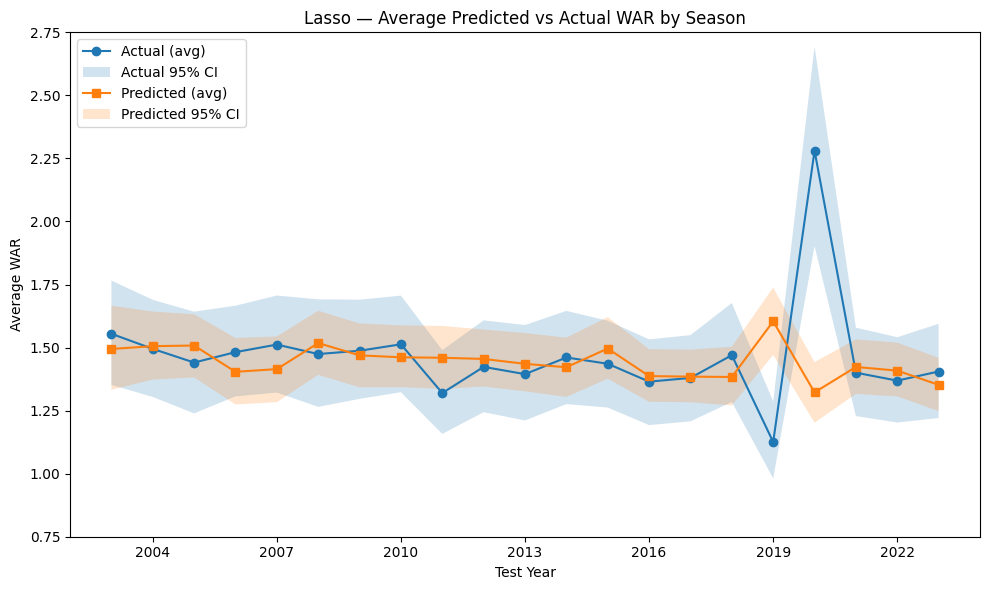

In [30]:
res_df_full, summary_full, year_stats_full = backtest_lasso(
    df, alpha=0.01, max_iter=20000, random_state=42
)

print("\n=== Lasso on full df — Walk-forward summary ===")
print(summary_full.round(4))

plot_yearly_avg_ci(
    year_stats_full
)

In [60]:
df2 = df[df['Season'] != 2020]


=== Lasso on df2 (2020 removed) — Walk-forward summary ===
         RMSE              R2        
         mean     std    mean     std
Model                                
Lasso  1.1918  0.0931  0.3605  0.1337


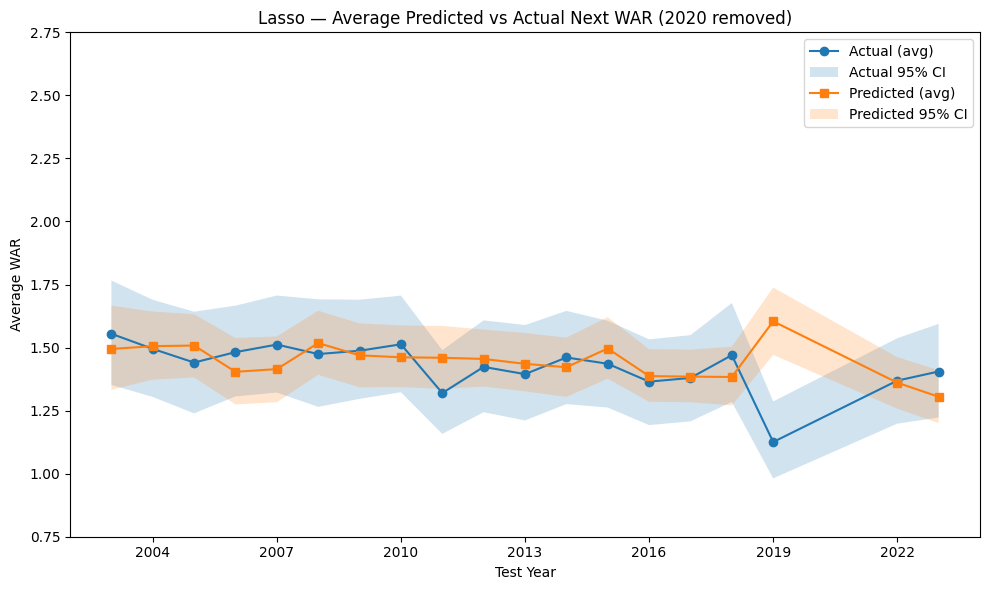

In [61]:
res_df2, summary2, year_stats2 = backtest_lasso(df2)

print("\n=== Lasso on df2 (2020 removed) — Walk-forward summary ===")
print(summary2.round(4))

plot_yearly_avg_ci(
    year_stats2, 
    title="Lasso — Average Predicted vs Actual Next WAR (2020 removed)"
)

In [62]:
def lasso_predict_next_war(
    df,
    test_feature_year=2023,
    alpha=0.01,
    max_iter=20000,
    random_state=42,
    test_features_df=None,
    compute_metrics='auto',
    sort_pred_desc=True
):
    df_ = df.copy()

    exclude = {'Next_WAR', 'Season', 'Name', 'Team'}
    if 'IDfg' in df_.columns:
        exclude.add('IDfg')
    feature_cols = [c for c in df_.columns if c not in exclude]
    X_all = df_[feature_cols].select_dtypes(include=[np.number]).copy()
    y_all = df_['Next_WAR'].to_numpy()

    train_cutoff = test_feature_year - 1
    train_mask = df_['Season'] <= train_cutoff
    X_train, y_train = X_all.loc[train_mask], y_all[train_mask]

    if test_features_df is None:
        test_df = df_.loc[df_['Season'] == test_feature_year].copy()
        if test_df.empty:
            raise RuntimeError(
                f"No rows with Season == {test_feature_year}. "
                f"If you’re predicting a future year, pass test_features_df."
            )
        X_test = X_all.loc[test_df.index]
        y_test = test_df['Next_WAR'].to_numpy() if 'Next_WAR' in test_df.columns else None
    else:
        test_df = test_features_df.copy()
        drop_for_feats = [c for c in ['IDfg','Name','Team','Age','Season'] if c in test_df.columns]
        X_test = (test_df.drop(columns=drop_for_feats, errors='ignore')
                        .select_dtypes(include=[np.number])
                        .reindex(columns=X_train.columns, fill_value=0.0))
        y_test = test_df['Next_WAR'].to_numpy() if 'Next_WAR' in test_df.columns else None

    scaler = ColumnTransformer([('num', StandardScaler(), X_train.columns.tolist())], remainder='drop')
    lasso  = Lasso(alpha=alpha, max_iter=max_iter, random_state=random_state)
    pipe   = Pipeline([('prep', scaler), ('model', lasso)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    next_year = test_feature_year + 1
    pred_col = f'Predicted_{next_year}_WAR'

    meta_cols = [c for c in ['IDfg','Name','Team','Age','Season','IP','WAR','G','GS'] if c in test_df.columns]
    out = test_df[meta_cols].copy()
    if 'Season' in out.columns:
        out = out.rename(columns={'Season': 'Season (features)'})
    out[pred_col] = y_pred

    def _should_compute_metrics():
        if compute_metrics is True:
            return True
        if compute_metrics is False:
            return False
        return (y_test is not None) and np.isfinite(y_test).all()

    if _should_compute_metrics():
        m = evaluate(y_test, y_pred)
        metrics = {'RMSE': float(m['RMSE']), 'R2': float(m['R2']),
                   'train_upto': int(train_cutoff), 'test_year': int(next_year)}
        out[f'Actual_{next_year}_WAR'] = y_test
        out['Error'] = out[pred_col] - out[f'Actual_{next_year}_WAR']
        out['AbsError'] = out['Error'].abs()
    else:
        metrics = {'RMSE': 'N/A', 'R2': 'N/A',
                   'train_upto': int(train_cutoff), 'test_year': int(next_year)}

    if sort_pred_desc:
        out = out.sort_values(pred_col, ascending=False).reset_index(drop=True)

    return out, metrics, pipe

In [34]:
pred_2024_table, pred_2024_metrics, lasso_2024 = lasso_predict_next_war(df2, test_feature_year=2023)

print("=== Lasso — Predicting 2024 WAR (trained through 2022, features=2023) ===")
print(f"RMSE: {pred_2024_metrics['RMSE']:.3f}  |  R²: {pred_2024_metrics['R2']:.3f}")

display_cols = [c for c in ['IDfg','Name','Season (features)',
                            'Actual_2024_WAR','Predicted_2024_WAR','Error']
                if c in pred_2024_table.columns]

=== Lasso — Predicting 2024 WAR (trained through 2022, features=2023) ===
RMSE: 1.085  |  R²: 0.382


In [63]:
def build_corr_pruned_df(
    df,
    threshold=0.9,
    exclude=('Next_WAR','Season','Name','Team','IDfg'),
    protect=('IP',),
    verbose=True
):
    df_ = df.copy()
    excl = set(exclude) & set(df_.columns)
    prot = set(protect) & set(df_.columns)

    feat_cols = [c for c in df_.select_dtypes(include=[np.number]).columns if c not in excl]
    X = df_[feat_cols]

    corr_abs = X.corr().abs()
    upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

    to_drop = []
    for col in upper.columns:
        if col in prot:
            continue
        if (upper[col] >= threshold).any():
            to_drop.append(col)

    report_rows = []
    for col in to_drop:
        partners = corr_abs[col].drop(index=col)
        if partners.empty:
            report_rows.append((col, None, np.nan))
        else:
            partner = partners.idxmax()
            report_rows.append((col, partner, float(partners[partner])))

    df_pruned = df_.drop(columns=to_drop, errors='ignore')
    dropped_report = pd.DataFrame(report_rows, columns=['dropped_col','max_corr_with','abs_corr'])

    if verbose:
        print(f"Dropped {len(to_drop)} highly collinear features (|ρ| ≥ {threshold}).")

    return df_pruned, to_drop, corr_abs, dropped_report

In [64]:
df3, dropped_cols_df3, corr_df3, dropped_report_df3 = build_corr_pruned_df(df2, threshold=0.9, verbose=True)

Dropped 50 highly collinear features (|ρ| ≥ 0.9).


In [65]:
dropped_report_df3.sort_values('abs_corr', ascending=False).head(20)

,dropped_col,max_corr_with,abs_corr
18,REW,RE24,0.998053
14,RAR,WAR,0.997321
8,Strikes,Pitches,0.995935
9,Pitches,Strikes,0.995935
0,TBF,IP,0.995769
3,ER,R,0.994754
2,R,ER,0.994754
11,AVG,H/9,0.994104
36,H/9+,AVG+,0.993632
38,AVG+,H/9+,0.993632


In [75]:
pred_2024_table, pred_2024_metrics, lasso_2024 = lasso_predict_next_war(df3, test_feature_year=2023)

print("=== Lasso — Predicting 2024 WAR (trained through 2022, features=2023) ===")
print(f"RMSE: {pred_2024_metrics['RMSE']:.3f}  |  R²: {pred_2024_metrics['R2']:.3f}")

display_cols = [c for c in ['IDfg','Name','Season (features)',
                            'Actual_2024_WAR','Predicted_2024_WAR','Error']
                if c in pred_2024_table.columns]

pred_2024_table[display_cols].head(15)

=== Lasso — Predicting 2024 WAR (trained through 2022, features=2023) ===
RMSE: 1.084  |  R²: 0.383


,IDfg,Name,Season (features),Actual_2024_WAR,Predicted_2024_WAR,Error
0,10310,Zack Wheeler,2023,5.4,3.527245,-1.872755
1,17085,Pablo Lopez,2023,3.2,3.500753,0.300753
2,14107,Kevin Gausman,2023,3.0,3.479309,0.479309
3,17995,Logan Webb,2023,4.4,3.383958,-1.016042
4,13125,Gerrit Cole,2023,1.8,3.327549,1.527549
5,17312,Justin Steele,2023,3.0,3.153378,0.153378
6,19291,Zac Gallen,2023,2.8,3.145693,0.345693
7,17295,Framber Valdez,2023,3.6,3.125075,-0.474925
8,13774,Zach Eflin,2023,2.8,3.070204,0.270204
9,25436,George Kirby,2023,4.2,3.038786,-1.161214


In [ ]:
def _get_feature_names_from_ct(prep):
    try:
        return list(prep.named_transformers_['num'].feature_names_in_)
    except Exception:
        for name, transformer, cols in prep.transformers_:
            if name == 'num':
                return list(cols)
        raise RuntimeError("Could not extract feature names from the ColumnTransformer.")

def get_lasso_coef_table(pipe, scale='standardized'):
    model = pipe.named_steps['model']
    prep  = pipe.named_steps['prep']
    names = _get_feature_names_from_ct(prep)

    beta_std = np.asarray(model.coef_, dtype=float)
    if beta_std.size != len(names):
        raise RuntimeError("Coefficient length does not match feature names length.")

    if scale == 'standardized':
        coef = beta_std
    elif scale == 'original':
        scaler = prep.named_transformers_['num']
        scales = np.asarray(scaler.scale_, dtype=float)
        means  = np.asarray(scaler.mean_, dtype=float)
        coef = beta_std / np.where(scales == 0, 1.0, scales)
    else:
        raise ValueError("scale must be 'standardized' or 'original'")

    dfc = pd.DataFrame({
        'feature': names,
        'coef': coef
    })
    dfc['abs_coef'] = dfc['coef'].abs()
    return dfc.sort_values('abs_coef', ascending=False)

def plot_coef_bars(coef_df, top_n=25, title="Lasso Coefficients (standardized)"):
    plot_df = coef_df[coef_df['coef'] != 0].head(top_n).copy()
    if plot_df.empty:
        raise ValueError("All coefficients are zero; nothing to plot.")
    plot_df = plot_df.iloc[::-1]

    plt.figure(figsize=(10, max(6, 0.35 * len(plot_df))))
    plt.barh(plot_df['feature'], plot_df['coef'])
    plt.axvline(0, linewidth=1)
    plt.xlabel("Coefficient")
    plt.title(title)
    plt.tight_layout()
    plt.show()


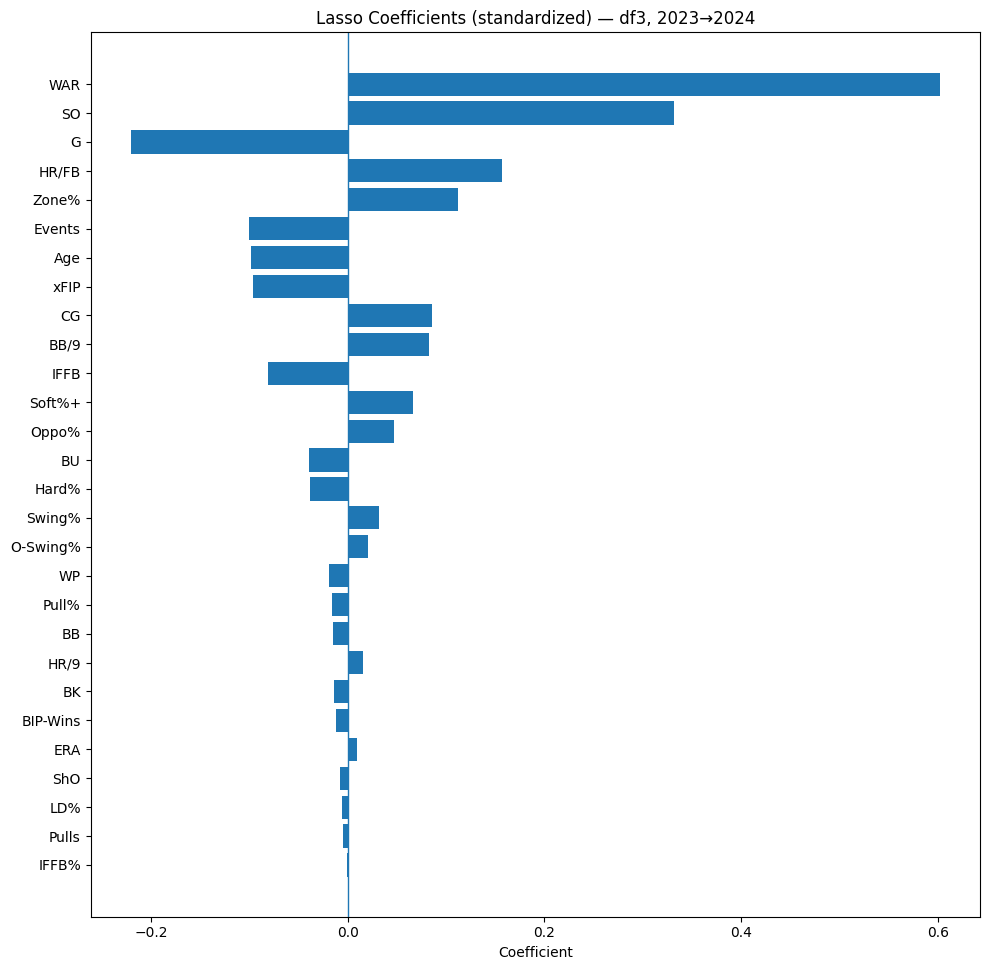

In [77]:
pred_2024_tbl_df3, metrics_2024_df3, pipe_df3 = lasso_predict_next_war(df3, test_feature_year=2023)

coef_df_std = get_lasso_coef_table(pipe_df3, scale='standardized')
plot_coef_bars(coef_df_std, top_n=30, title="Lasso Coefficients (standardized) — df3, 2023→2024")


In [70]:
proj_rows = [
    ("Chris Sale",            4.5, 3.4),
    ("Tarik Skubal",          5.0, 5.4),
    ("Garrett Crochet",       4.8, 4.2),
    ("Zack Wheeler",          4.6, 4.2),
    ("Cole Ragans",           3.6, 3.0),
    ("Paul Skenes",           5.8, 3.7),
    ("Dylan Cease",           3.6, 3.6),
    ("Tyler Glasnow",         3.7, 3.0),
    ("Cristopher Sanchez",    3.2, 2.9),
    ("Sonny Gray",            3.7, 2.3),
]
steamer_zips = pd.DataFrame(proj_rows, columns=["Name","Steamer_2025_WAR","ZiPS_2025_WAR"])

In [71]:
raw = pd.read_csv("pitching.csv", index_col=0)
features_2024 = raw[raw['Season'] == 2024].copy()

pred_2025_table, metrics_2025, pipe_2025 = lasso_predict_next_war(
    df3,
    test_feature_year=2024,
    test_features_df=features_2024,
    compute_metrics='auto',
    sort_pred_desc=True
)

In [72]:
comp = (
    steamer_zips.merge(
        pred_2025_table[['Name', 'Predicted_2025_WAR']],
        on='Name', how='left'
    )
    .assign(
        Diff_vs_Steamer=lambda d: d['Predicted_2025_WAR'] - d['Steamer_2025_WAR'],
        Diff_vs_ZiPS=lambda d: d['Predicted_2025_WAR'] - d['ZiPS_2025_WAR'],
    )
)

comp = (
    comp[['Name', 'Predicted_2025_WAR', 'Steamer_2025_WAR', 'ZiPS_2025_WAR',
          'Diff_vs_Steamer', 'Diff_vs_ZiPS']]
    .round(2)
    .sort_values('Predicted_2025_WAR', ascending=False)
    .reset_index(drop=True)
)

comp

,Name,Predicted_2025_WAR,Steamer_2025_WAR,ZiPS_2025_WAR,Diff_vs_Steamer,Diff_vs_ZiPS
0,Chris Sale,4.75,4.5,3.4,0.25,1.35
1,Tarik Skubal,4.62,5.0,5.4,-0.38,-0.78
2,Garrett Crochet,4.41,4.8,4.2,-0.39,0.21
3,Zack Wheeler,4.22,4.6,4.2,-0.38,0.02
4,Cole Ragans,4.00,3.6,3.0,0.40,1.00
5,Paul Skenes,3.88,5.8,3.7,-1.92,0.18
6,Dylan Cease,3.82,3.6,3.6,0.22,0.22
7,Tyler Glasnow,3.81,3.7,3.0,0.11,0.81
8,Cristopher Sanchez,3.69,3.2,2.9,0.49,0.79
9,Sonny Gray,3.67,3.7,2.3,-0.03,1.37
